# Aufgabe 4.0

In [586]:
import pandas as pd

# 0 - load data
path_erwerb = "../data/census/soziodemo_zip/Neu_Bevoelkerung_nach_Erwerbsstatus_2011_V1_28Mai2013.csv"
df_with_subtotals = pd.read_csv(path_erwerb, sep=";")
df = df_with_subtotals[df_with_subtotals["KREIS"] != "Gesamt"] # create copy without subtotals

#1
result_1 = df.groupby("LAND")["ERWERBST"]\
.agg(np.sum).sort_values(ascending=False)[:1]
print("Aufgabe 1:\n{} hat die meisten Erwerbstätigen: {}\n".format(result_1.index[0], result_1.values[0]))

#2
df.loc[df.ERW18 == "/", "ERW18"] = 0 # replace '/' with 0
result_2 = \
df.groupby("LAND")[["ERW18", "BEV"]]\
.agg(lambda x: np.sum(pd.to_numeric(x)))\
.apply(lambda row: float(row["ERW18"]) / row["BEV"], axis=1)
print("Aufgabe 2:\nRelativer Anteil der Erwerbstätigen unter 18 pro Bundesland:\n{}\n".format(result_2))

#3
result_3 = \
df.groupby("LAND")["ERW18"]\
.agg(lambda x: np.var(pd.to_numeric(x)))\
.sort_values(ascending=False)[:1]
print("Aufgabe 3:\n{} ist das Bundesland mit der höchsten Varianz der Erwerbstätigen unter 18: {}\n"\
     .format(result_3.index[0], result_3.values[0]))

#4
df.loc[:, "ERW18byBEV"] = df.apply(lambda row: pd.to_numeric(row["ERW18"]) / float(row["BEV"]), axis=1) # 
result_4 = \
df.groupby("LAND")["ERW18byBEV"]\
.agg(np.ptp) # ptp = "peak to peak"
print("Aufgabe 4:\nSpanne der Anteile der Erwerbstätigen unter 18:\n{}".format(result_4))

Aufgabe 1:
Nordrhein-Westfalen hat die meisten Erwerbstätigen: 8418180

Aufgabe 2:
Relativer Anteil der Erwerbstätigen unter 18 pro Bundesland:
LAND
Baden-Württemberg         0.007678
Bayern                    0.007828
Berlin                    0.002465
Brandenburg               0.001898
Bremen                    0.003261
Hamburg                   0.003892
Hessen                    0.005385
Mecklenburg-Vorpommern    0.000000
Niedersachsen             0.005343
Nordrhein-Westfalen       0.003676
Rheinland-Pfalz           0.005757
Saarland                  0.004318
Sachsen                   0.002791
Sachsen-Anhalt            0.001513
Schleswig-Holstein        0.005865
Thüringen                 0.000612
dtype: float64

Aufgabe 3:
Baden-Württemberg ist das Bundesland mit der höchsten Varianz der Erwerbstätigen unter 18: 1299094.42149

Aufgabe 4:
Spanne der Anteile der Erwerbstätigen unter 18:
LAND
Baden-Württemberg         0.013621
Bayern                    0.014786
Berlin                  

# Aufgabe 4.1

Aufgabe 2:
Die Top 10 Länder mit der größten prozentualen Spanne in Bezug auf BEV:
LAND
Brandenburg               0.075265
Thüringen                 0.066930
Sachsen-Anhalt            0.065303
Mecklenburg-Vorpommern    0.058686
Sachsen                   0.057851
Saarland                  0.054837
Rheinland-Pfalz           0.049844
Schleswig-Holstein        0.049187
Niedersachsen             0.046233
Baden-Württemberg         0.042557
dtype: float64


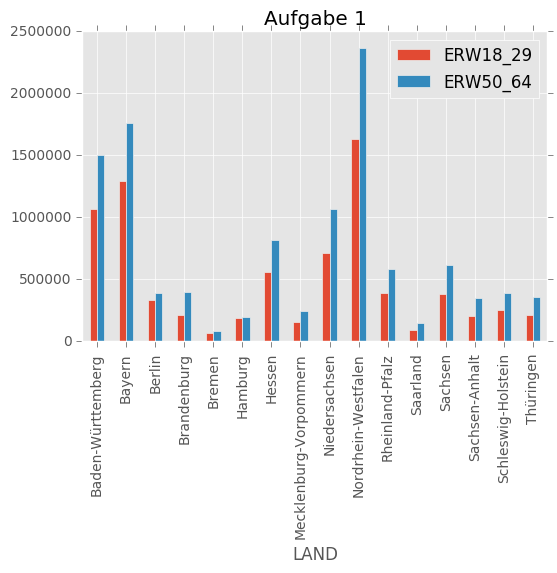

In [634]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use("ggplot")

#1
result_1 = df.groupby("LAND")[["ERW18_29", "ERW50_64"]].agg(np.sum)
fig, axes = plt.subplots(1,1)
result_1.plot(kind="bar", ax=axes, title="Aufgabe 1")
fig.show()

#2
result_2 = df.groupby("LAND")[["ERW18_29", "ERW50_64", "BEV"]]\
.agg(np.sum).apply(lambda row: np.fabs(row["ERW18_29"] - row["ERW50_64"])/row["BEV"], axis=1)\
.sort_values(ascending=False)[:10,]
print("Aufgabe 2:\nDie Top 10 Länder mit der größten prozentualen Spanne in Bezug auf BEV:\n{}".format(result_2))


# Aufgabe 4.2

In [699]:
tmp = df.loc[:, ["LAND","BEV", "ERWERBSL", "ERWOAUS", "ERWBERUF", "ERWHOCH"]].groupby("LAND").agg(np.sum)
tmp

,BEV,ERWERBSL,ERWOAUS,ERWBERUF,ERWHOCH
LAND,,,,,
Baden-Württemberg,10411000,195140,1066740,3317240,1029530
Bayern,12308270,214380,1156660,4177090,1191060
Berlin,3269260,158990,308120,775120,490650
Brandenburg,2439100,90460,128660,878590,244050
Bremen,646980,23960,71450,163850,70230
Hamburg,1693120,58660,180890,436060,245020
Hessen,5946060,135090,622970,1712280,655030
Mecklenburg-Vorpommern,1585740,69290,79580,564530,136740
Niedersachsen,7723670,191320,738100,2446780,606250


In [803]:
tmp_rel =  tmp.apply(lambda row: row.loc[["ERWERBSL", "ERWOAUS", "ERWBERUF", "ERWHOCH"]]/row["BEV"], axis=1)
tmp_rel

,ERWERBSL,ERWOAUS,ERWBERUF,ERWHOCH
LAND,,,,
Baden-Württemberg,0.018744,0.102463,0.318628,0.098889
Bayern,0.017418,0.093974,0.339373,0.096769
Berlin,0.048632,0.094248,0.237093,0.150080
Brandenburg,0.037087,0.052749,0.360211,0.100057
Bremen,0.037034,0.110436,0.253254,0.108550
Hamburg,0.034646,0.106838,0.257548,0.144715
Hessen,0.022719,0.104770,0.287969,0.110162
Mecklenburg-Vorpommern,0.043696,0.050185,0.356004,0.086231
Niedersachsen,0.024771,0.095563,0.316790,0.078492


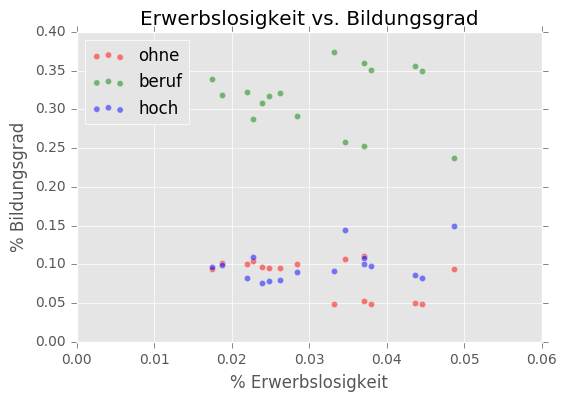

In [802]:
plt.scatter(x = tmp_rel.loc[:,"ERWERBSL"], y = tmp_rel.loc[:,"ERWOAUS"], c = "red", alpha=.5, label="ohne")
plt.scatter(x = tmp_rel.loc[:,"ERWERBSL"], y = tmp_rel.loc[:,"ERWBERUF"], c = "green", alpha=.5, label="beruf")
plt.scatter(x = tmp_rel.loc[:,"ERWERBSL"], y = tmp_rel.loc[:,"ERWHOCH"], c = "blue", alpha=.5, label="hoch")
plt.xlabel("% Erwerbslosigkeit")
plt.ylabel("% Bildungsgrad")
plt.title("Erwerbslosigkeit vs. Bildungsgrad")
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.show()

---
# Additional Resources

## How to address cells in a DataFrame

In [228]:
ind = ["ROW via INDEX", "ROW via POSITION"]
data = {\
       "COL via LABEL" : [".loc or .ix", ".ix if LABEL != INT"],\
       "COL via POSITION" : [".ix", ".iloc or .ix if LABEL != INT"]}
pd.DataFrame(data, ind)

,COL via LABEL,COL via POSITION
ROW via INDEX,.loc or .ix,.ix
ROW via POSITION,.ix if LABEL != INT,.iloc or .ix if LABEL != INT


## Pandas essentials
* http://tomaugspurger.github.io/modern-1.html
* http://tomaugspurger.github.io/method-chaining.html
* http://tomaugspurger.github.io/modern-3-indexes.html
* http://tomaugspurger.github.io/modern-4-performance.html
* http://tomaugspurger.github.io/modern-5-tidy.html
* http://tomaugspurger.github.io/modern-6-visualization.html
* http://tomaugspurger.github.io/modern-7-timeseries.html